In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from LinReg import LinearRegressionGD
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,sep="\s+")

In [3]:
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df[["RM"]].values
y = df[["MEDV"]].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
#lr = LinearRegressionGD()
#lr.fit(X_std,y_std)

In [5]:
slr = LinearRegression()
slr.fit(X,y)
print("Slope: %.3f"%slr.coef_[0])
print("Intecept: %.3f"%slr.intercept_)

Slope: 9.102
Intecept: -34.671


/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [6]:
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
                         residual_metric=lambda x: np.sum(np.abs(x),axis=1),
                        residual_threshold=5.0,random_state=0)

In [7]:
ransac.fit(X,y)

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x10f238848>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [8]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Validating the model 

In [9]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)
slr = LinearRegression()
slr.fit(X,y)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [10]:
import analyze

In [11]:
an = analyze.analysis(X_train,y_train,slr)
an.Leverage(interact=True)

Loading BokehJS ...

Loading BokehJS ...

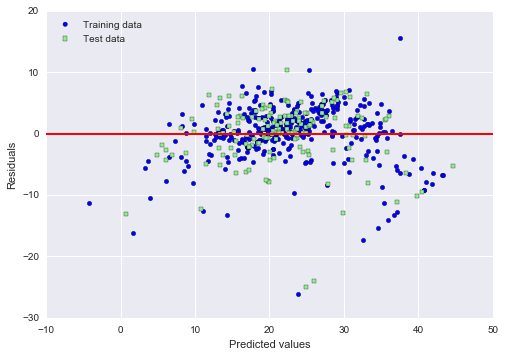

In [15]:
plt.scatter(y_train_pred, y_train_pred-y_train, c="blue",marker="o",label="Training data")
plt.scatter(y_test_pred,y_test_pred-y_test,c="lightgreen",marker="s",label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="red")
plt.xlim([-10,50])
plt.show()

In [17]:
print("MSE train: %.3f, test: %.3f"%(mean_squared_error(y_train,y_train_pred),
                                    mean_squared_error(y_test,y_test_pred)))

MSE train: 20.200, test: 25.843


In [19]:
print("R^2 train: %.3f, test %.3f"%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.762, test 0.690


In [21]:
X = df[["LSTAT"]].values
y = df[["MEDV"]].values
regr = LinearRegression()

In [22]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [24]:
X_fit = np.arange(X.min(), X.max(),1)[:,np.newaxis]
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

In [25]:
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

In [27]:
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

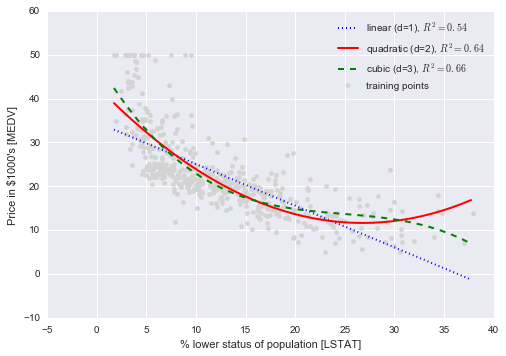

In [28]:
plt.scatter(X,y,label="training points",color="lightgray")
plt.plot(X_fit,y_lin_fit,label="linear (d=1), $R^2=%.2f$"% linear_r2,color="blue",
         lw=2,linestyle=":")
plt.plot(X_fit,y_quad_fit,label="quadratic (d=2), $R^2=%.2f$"% quadratic_r2,color="red",
         lw=2,linestyle="-")
plt.plot(X_fit,y_cubic_fit,label="cubic (d=3), $R^2=%.2f$"% cubic_r2,color="green",
         lw=2,linestyle="--")
plt.xlabel("% lower status of population [LSTAT]")
plt.ylabel("Price in $1000's [MEDV]")
plt.legend(loc="upper right")
plt.show()


In [30]:
X = df[["LSTAT"]].values
y = df[["MEDV"]].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()


In [32]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
fortest = RandomForestRegressor(n_estimators=1000,criterion="mse",random_state=1,n_jobs=-1)
fortest.fit(X_train,y_train)
y_train_pred = fortest.predict(X_train)
y_test_pred = fortest.predict(X_test)
print("MSE train: %.3f, test: %.3f"%(mean_squared_error(y_train,y_train_pred),
                                    mean_squared_error(y_test,y_test_pred)))
print("R^2 train: %.3f, test: %.3f"%(r2_score(y_train,y_train_pred),
                                    r2_score(y_test,y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878
